# Итоговая домашняя работа по модулю "Математика для Data Science"

Задание 1
Вычислите производную функции:

f(x) = (tg(sin(x) + cos(2x+3))**2, в точке x0=1


In [82]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import scipy
from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.optimize import curve_fit

from scipy.stats import norm
%matplotlib inline

In [83]:
import math
import sympy as sym


In [84]:
# x - задание переменной (аналитический символ)
x = sym.Symbol('x')

In [85]:
# задание функции от аналитической переменной
arg1 = sym.sin(x) + sym.cos(2*x+3)
fx = (sym.tan(arg1))**2
fx

tan(sin(x) + cos(2*x + 3))**2

In [86]:
# Значение функции в точке x = 0
y = fx.subs(x,0)
y

tan(cos(3))**2

In [87]:
# Создание аналитической производной (в общем виде от x)
fx_diff_x = sym.diff(fx, x)
fx_diff_x

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [88]:
# Значение производной в точке x0 = 1
fx_diff_x.subs(x,1)

2*(1 + tan(cos(5) + sin(1))**2)*(cos(1) - 2*sin(5))*tan(cos(5) + sin(1))

In [89]:
arg2 = math.cos(5)
arg3 = math.sin(5)

arg4 = math.sin(1)
arg5 = math.cos(1)

arg6 = arg2 + arg4

In [90]:
res = 2* (1+ (math.tan(arg6))**2)*(arg5 - 2*arg3)*(math.tan(arg6))
print(f'Производная функции fx в точке x=1 равна: {res}')

Производная функции fx в точке x=1 равна: 55.385917635337854




---



Задание 2

Дан объект в 2d
 пространстве

При помощи матричных операций выполните:

Масштабирование и смещение объекта (применить 2 матрицы трансформаций).

 Масштабирование на (0.5, 1.2) и смещение на (200, 300)

(-200.0, 200.0)

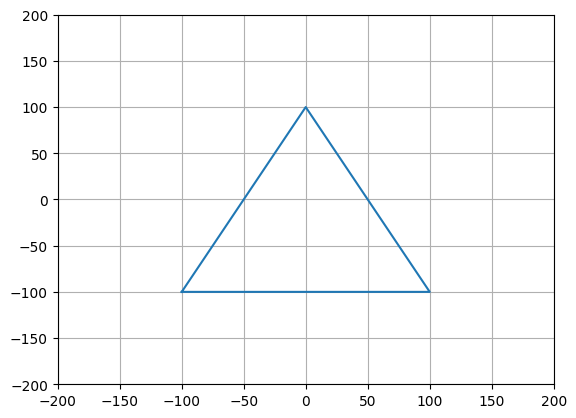

In [91]:
import numpy as np
import matplotlib.pyplot as plt

A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]

plt.grid()
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

In [92]:
A

array([[-100, -100,    1],
       [   0,  100,    1],
       [ 100, -100,    1],
       [-100, -100,    1]])

In [93]:
# Масштабирование

# Задание линейного оператора B1

B1 = np.array([[0.5, 0, 0], [0, 1.2, 0], [0, 0, 1]])


In [94]:
# Смещение

# Задание линейного оператора B2

B2 = np.array([[1, 0, 200], [0, 1, 300], [0, 0, 1]])


In [95]:
# Применение линейного оператора B1
# к матрице A
# через матричное умножение

B = B1@A.transpose()
tt = B.transpose()



(-200.0, 200.0)

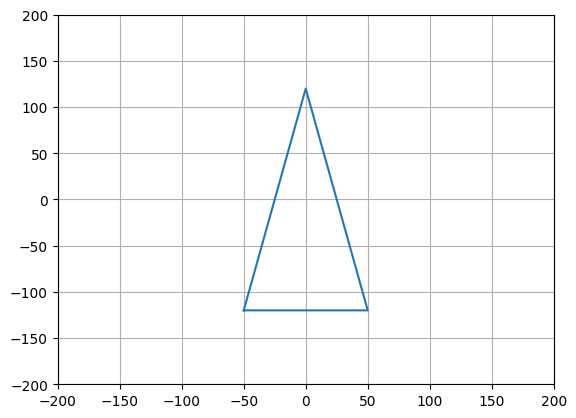

In [96]:
# Визуализация результата

A1 = np.array(tt);
x = A1[:,0];
y = A1[:,1];

plt.grid()
plt.plot(x,y)

plt.ylim([-200,200])
plt.xlim([-200,200])

In [97]:
# Применение линейного оператора B2
# к матрице B
# через матричное умножение

res = B2@B
tt = res.transpose()



(-200.0, 500.0)

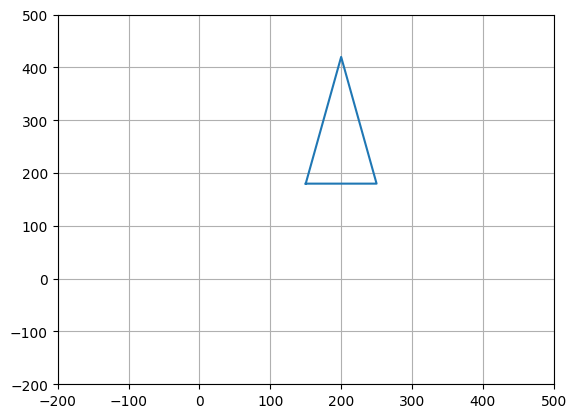

In [98]:
# Визуализация результата

A1 = np.array(tt);
x = A1[:,0];
y = A1[:,1];

plt.grid()
plt.plot(x,y)

plt.ylim([-200,500])
plt.xlim([-200,500])



---



Задание 3

Найдите собственные значения и собственные вектора матрицы:

In [99]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [100]:
# Определение собственных векторов
# Общий вид
res = np.linalg.eig(m)
print(f'Собственные числа матрицы m:  {res[0][0], res[0][1]}')
print(f'Собственные вектора матрицы m: {res[1][0] , res[1][1]}')

Собственные числа матрицы m:  (3.0000000000000004, -0.9999999999999996)
Собственные вектора матрицы m: (array([ 0.89442719, -0.89442719]), array([0.4472136, 0.4472136]))




---



Задание 4


Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x.

Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error.

In [101]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [102]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])


In [103]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

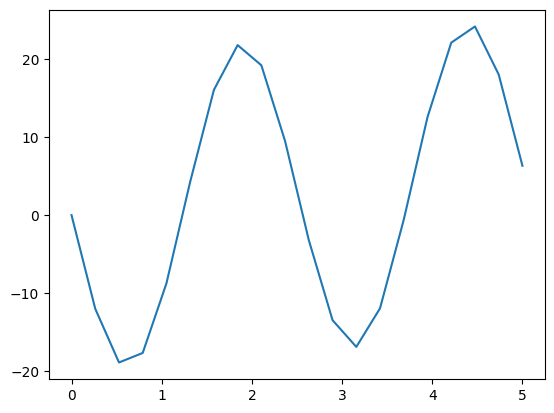

In [104]:
plt.plot(x, fx)
plt.show()

In [105]:
# Функция оценки потерь при аппроксимации f(x,a,b)
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [106]:
# Исходные данные
Y_fact = fx
X_fact = x

In [107]:
# Поиск оптимальных параметров a,b


def curve_fit_choose_p0_method(p0=[0,0], method_used = 'lm'):

  """
    Функция
    на вход принимает начальное значение параметров a,b (точка p0), метод ('lm', 'trf', 'dogbox')
    возвращает подобранные параметры a,b и величину ошибки: отклонения факта от прогноза исходной функции
    функция ошибки задана функцией error(x,a,b)

  """

  # Вывод всех результатов функции curve_fit при ее вызове согласно документации curve_fit
  full_output = True

  if full_output:

    # Блок try.. except необходим так как не всегда возможно, что curve_fit подберет параметры

    try:
      (popt, pcov, infodict, mesg, ier) = curve_fit(f, X_fact, Y_fact, p0=p0, method=method_used, full_output=full_output)
      integer_flag = f'ier = {ier}, the solution was found' if ier<=4 else f'ier = {ier}, the solution was not found'


      # значения функции, вычисленные на входном массиве x и найденными оптимальными параметрами
      Y_calc = f(x, *popt)

      # Оценка отклонения фактических значений функции от вычисленных для данных значений параметров (a,b)

      yF = np.array(Y_fact)
      yC = np.array(Y_calc)

      # Подсчет среднеквадратической ошибки
      # yErrSum = (np.sum((yC-yF)**2))/len(Y_fact)

      # Подсчет ошибки задаваемый функцией error(a,b)

      yErrSum = error(popt)

      return p0, method_used, popt[0],popt[1], yErrSum

    except:
      return p0, method_used, None, None, None



In [108]:
# Тест
curve_fit_choose_p0_method(p0 = [1,1])

([1, 1], 'lm', 1.296750475512307, 3.3824083364015323, 241.37374419584737)

In [109]:
# Диапазон изменения параметров
# (согласно документации curve_fit для функций с экспонентой
#  рекомендовано начинать с p0 = [0,0])

# Экспериментально возьмем начальные значения [a,b] от 0 до 1 с шагом 0.1
# !!! Ячейка выполняется 27 сек !!!

a_range = np.arange(0, 1, 0.1)
b_range = np.arange(0, 1, 0.1)

# Возможные методы
method_range = ['lm', 'trf', 'dogbox']

# Список с результатами
resList = []

best_params = None
best_start = None
best_err = float('inf')

for mm in method_range:
  for aa in a_range:
    for bb in b_range:

      # Вызываем curve_fit_choose_p0_method для текущих параметров

      try:
        res = curve_fit_choose_p0_method(p0 = [aa, bb], method_used = mm)

        # Найденные параметры a,b
        a = res[2]
        b = res[3]

        # Ошибка, определенная функцией error
        sum_abs_err = res[4]

        # Сохраняем параметры, если RMSE меньше текущего лучшего
        if  sum_abs_err < best_err:
            best_params = [a, b]
            best_start = [aa,bb,mm]
            best_err = sum_abs_err

      except:
        res = [aa, bb], mm, None, None, None

      resList.append(res)

res_df = pd.DataFrame(resList)

best_params, best_start, best_err

([3.000000000512191, -2.4999999994805804],
 [0.2, 0.9, 'lm'],
 1.5365230296993104e-06)

In [111]:
# Зададим в качестве начальных найденные оптимальные параметры
curve_fit_choose_p0_method(p0 = [3,-2.5])

([3, -2.5],
 'lm',
 3.0000000005121907,
 -2.4999999994805804,
 1.5365230332520241e-06)

Величина ошибки близка к нулю и не уменьшилась, найденное решение можно считать оптимальным

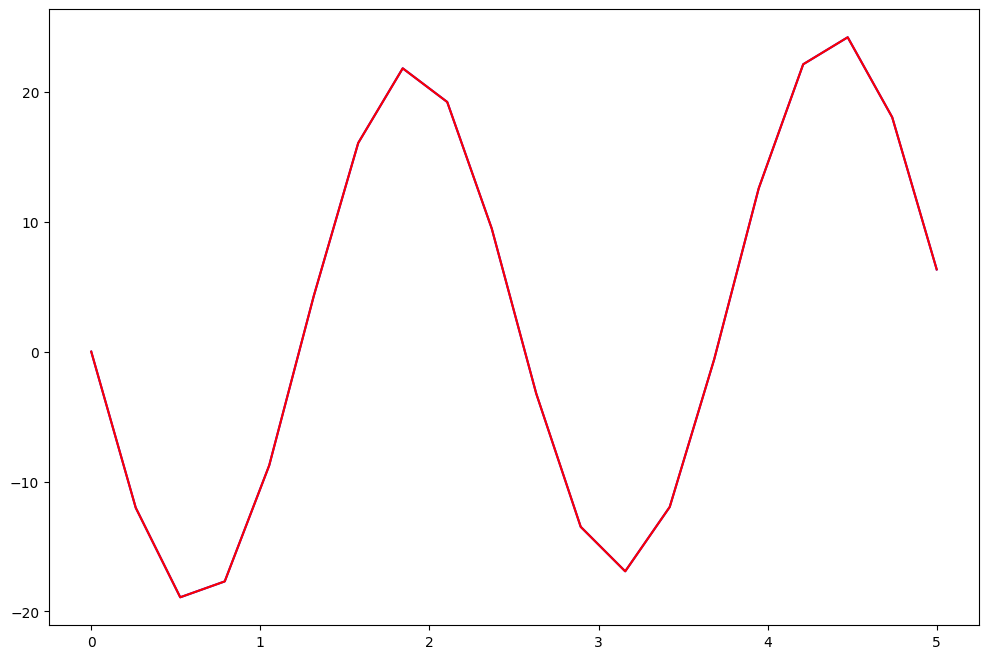

In [112]:
# Вывод: лучше всего параметры подобраны при начальных значениях a,b = [0.2, 0.9]
# метода 'lm'
# a,b = [0.2,0.9]

# сумма модулей разницы фактических и рассчитанных значений функции = 1.5*e-6

plt.figure(figsize=(12, 8))
plt.plot(x, fx, color='blue')
plt.plot(x, f(x, *best_params), color='red')
plt.show()



---



Задание 5

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [113]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

In [115]:
def cosine_similarity(vec_1, vec_2):

    """
    Функция возвращает косинус угла между векторами
    (в n-мерном пространстве косинусное сходство)
    """
    cosine_similarity = np.dot(vec_1, vec_2)/ (np.linalg.norm(vec_1) * np.linalg.norm(vec_2))

    return cosine_similarity

In [117]:
def correct_y_index(row):

  """
  При переборе элементов, не включающих в себя вектор, для которого
  выполняется поиск, происходит смещение индекса.
  Функция находит индекс второго вектора y в исходном массиве raitings

  """
  if row['x_index'] <= row['y_index']:

    return (row['y_index']+1)

  else:
    return row['y_index']

In [118]:
# Тест
cosine_similarity(raitings[0], raitings[1])

0.8260291914926011

In [127]:
res_List = []

for x_index, x in enumerate(raitings):

  # Список из всех векторов, кроме самого вектора ii
  temp_List = raitings
  pair_List = np.delete(temp_List, x_index, axis = 0)

  # Значение cos(x) изменяется от -1 до +1, начинаем с минимума
  # Начальное значение для best_cos
  best_cos = float(-1.01)

  # Начальное значение для best_pair
  best_pair = float('inf')

  for y_index, y in enumerate(pair_List):

    res = cosine_similarity(x, y)

    if res > best_cos:
      best_cos = res
      best_pair = y
      best_pair_index = y_index

  el = (x_index, x, best_pair_index, best_pair, best_cos)

  res_List.append(el)

df = pd.DataFrame(res_List)
df1 = df.sort_values(4, ascending=False)
df2 = df1.rename(columns={0: 'x_index', 1 : 'x_vector', 2 : 'y_index', 3: 'y_vector', 4: 'cos(x,y)'})

df2['y_index'] = df2.apply(correct_y_index, axis =1)

print('Для вектора x наибольшим косинусным сходством обладает вектор y, cos(x,y): значение косинуса между (x,y)')
print('x_index, y_index - индексы векторов x,y в массиве raitings')
print('')

df2


Для вектора x наибольшим косинусным сходством обладает вектор y, cos(x,y): значение косинуса между (x,y)
x_index, y_index - индексы векторов x,y в массиве raitings



,x_index,x_vector,y_index,y_vector,"cos(x,y)"
2,2,"[1, 6, 8, 8, 4, 9, 3, 8, 10, 5, 2, 6, 8, 1, 6]",9,"[5, 10, 8, 8, 9, 7, 2, 9, 9, 10, 8, 8, 8, 6, 10]",0.918731
9,9,"[5, 10, 8, 8, 9, 7, 2, 9, 9, 10, 8, 8, 8, 6, 10]",2,"[1, 6, 8, 8, 4, 9, 3, 8, 10, 5, 2, 6, 8, 1, 6]",0.918731
0,0,"[4, 4, 9, 4, 1, 6, 10, 7, 9, 6, 9, 2, 8, 6, 6]",8,"[2, 7, 7, 6, 10, 6, 8, 9, 8, 6, 10, 1, 7, 10, 4]",0.910660
8,8,"[2, 7, 7, 6, 10, 6, 8, 9, 8, 6, 10, 1, 7, 10, 4]",0,"[4, 4, 9, 4, 1, 6, 10, 7, 9, 6, 9, 2, 8, 6, 6]",0.910660
4,4,"[3, 7, 3, 5, 7, 9, 9, 6, 2, 9, 1, 2, 8, 10, 6]",8,"[2, 7, 7, 6, 10, 6, 8, 9, 8, 6, 10, 1, 7, 10, 4]",0.879485
1,1,"[9, 2, 5, 10, 7, 8, 10, 5, 6, 2, 1, 6, 8, 9, 7]",4,"[3, 7, 3, 5, 7, 9, 9, 6, 2, 9, 1, 2, 8, 10, 6]",0.871381
3,3,"[6, 1, 9, 7, 7, 9, 2, 3, 5, 1, 6, 6, 3, 2, 7]",9,"[5, 10, 8, 8, 9, 7, 2, 9, 9, 10, 8, 8, 8, 6, 10]",0.858869
5,5,"[8, 3, 7, 3, 8, 6, 1, 8, 8, 6, 1, 9, 4, 10, 1]",9,"[5, 10, 8, 8, 9, 7, 2, 9, 9, 10, 8, 8, 8, 6, 10]",0.855149
7,7,"[4, 1, 6, 4, 3, 10, 4, 4, 2, 8, 7, 9, 3, 8, 3]",5,"[8, 3, 7, 3, 8, 6, 1, 8, 8, 6, 1, 9, 4, 10, 1]",0.844517
6,6,"[9, 8, 4, 8, 8, 10, 6, 1, 1, 2, 9, 5, 2, 7, 2]",3,"[6, 1, 9, 7, 7, 9, 2, 3, 5, 1, 6, 6, 3, 2, 7]",0.832742
